# Loading and preparing data

In [1]:
#Load Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex
%matplotlib inline

!pip install haversine
from haversine import haversine, Unit

import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)

In [2]:
# Get the dataset
data = pd.read_csv('uber.csv')

In [60]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.shape

(200000, 9)

In [5]:
#Check the metadata
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Handling Missing Values and Visualising the dataset

In [7]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
#check the Null values column wise
(data.isnull().sum()/len(data)).sort_values(ascending = False)

dropoff_longitude    0.000005
dropoff_latitude     0.000005
Unnamed: 0           0.000000
key                  0.000000
fare_amount          0.000000
pickup_datetime      0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
passenger_count      0.000000
dtype: float64

*   **There no columns with null values that can be treated.**



In [9]:
#dropping rows with null values
data.dropna(inplace=True)

In [10]:
data.shape

(199999, 9)

In [11]:
data[data.duplicated()]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


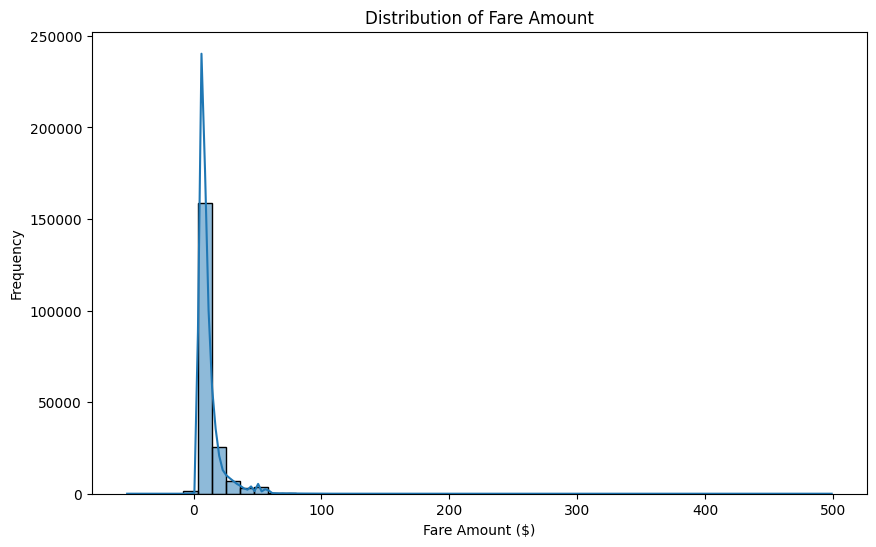

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

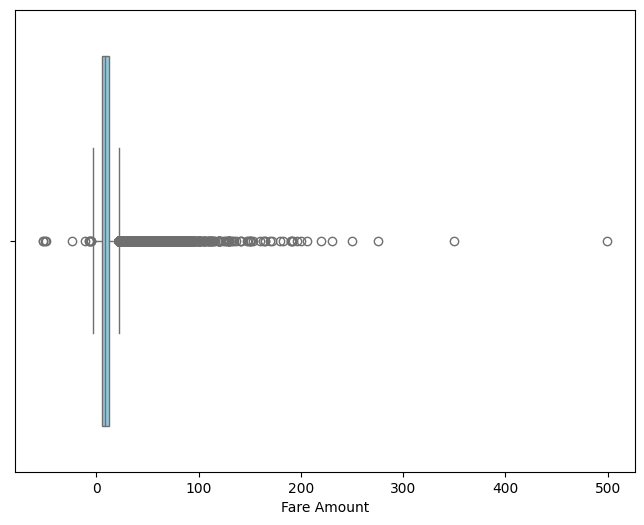

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=data, color='skyblue')
plt.xlabel('Fare Amount')
plt.show()

In [14]:
## Identifying outliers
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
data_clean = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound) & (data['fare_amount'] >= 0)]

# Reset index if needed
data_clean.reset_index(drop=True, inplace=True)


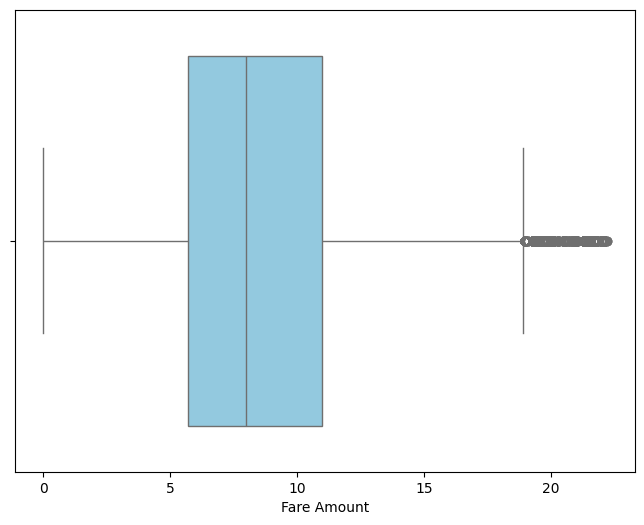

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=data_clean, color='skyblue')
plt.xlabel('Fare Amount')
plt.show()

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_clean['fare_amount'].quantile(0.25)
Q3 = data_clean['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
data_clean['fare_amount'] = data_clean['fare_amount'].clip(lower=lower_bound, upper=upper_bound)

# Reset index if needed
data_clean.reset_index(drop=True, inplace=True)

In [17]:
data_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


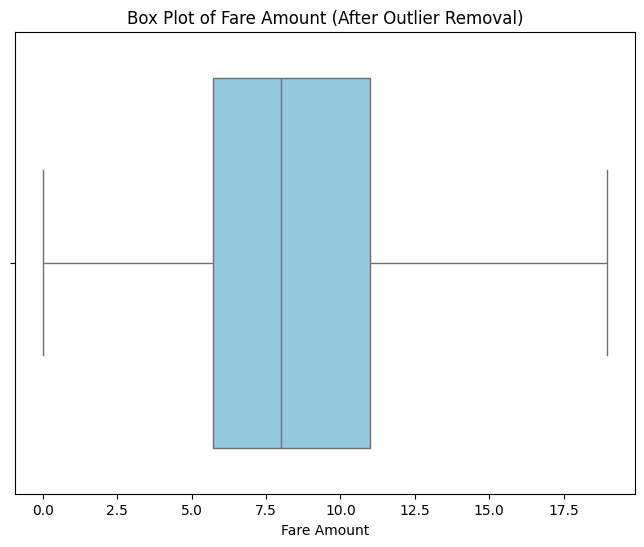

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=data_clean, color='skyblue')
plt.xlabel('Fare Amount')
plt.title('Box Plot of Fare Amount (After Outlier Removal)')
plt.show()

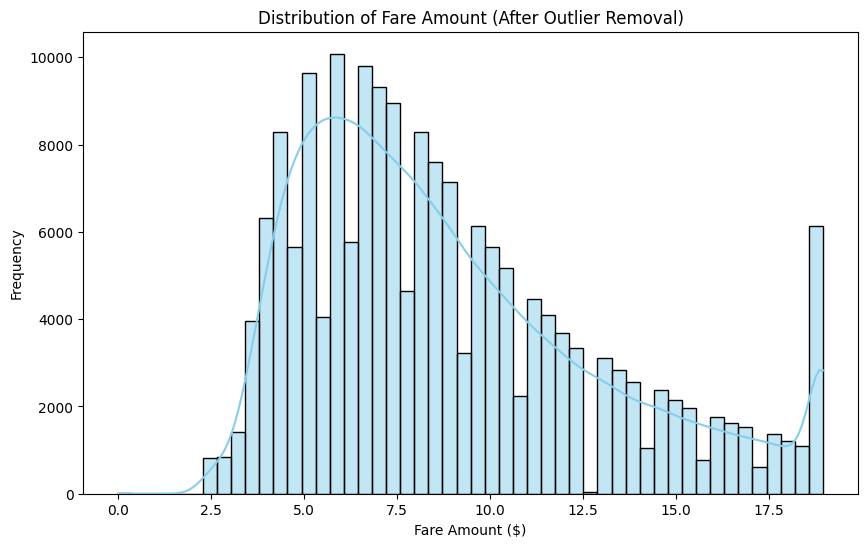

In [19]:
# Replotting after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Fare Amount (After Outlier Removal)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

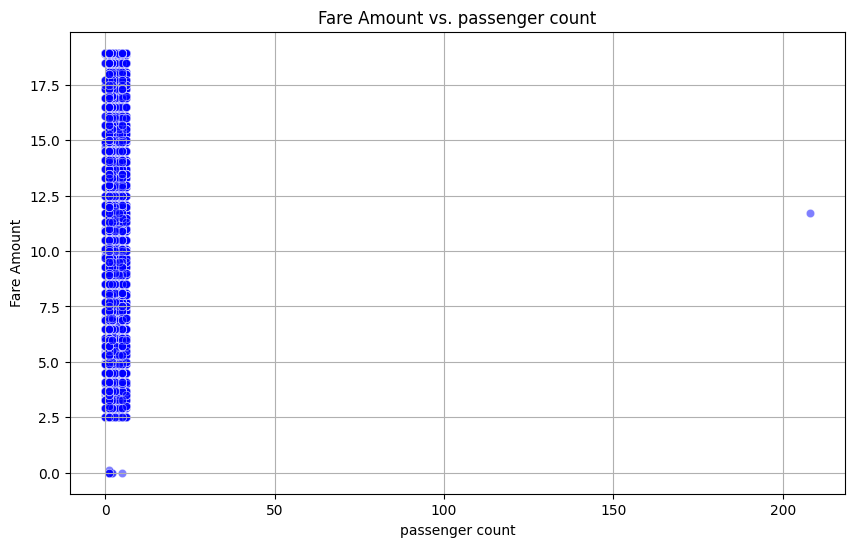

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. passenger count')
plt.xlabel('passenger count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

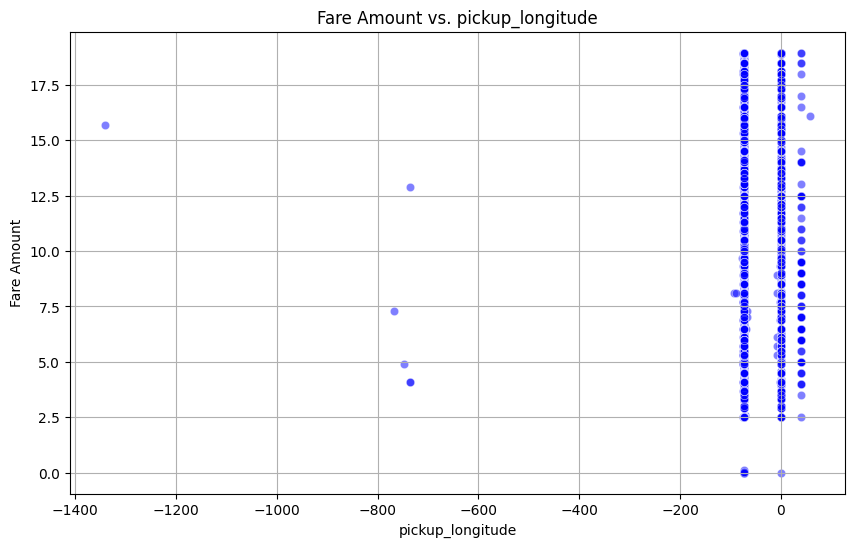

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. pickup_longitude')
plt.xlabel('pickup_longitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

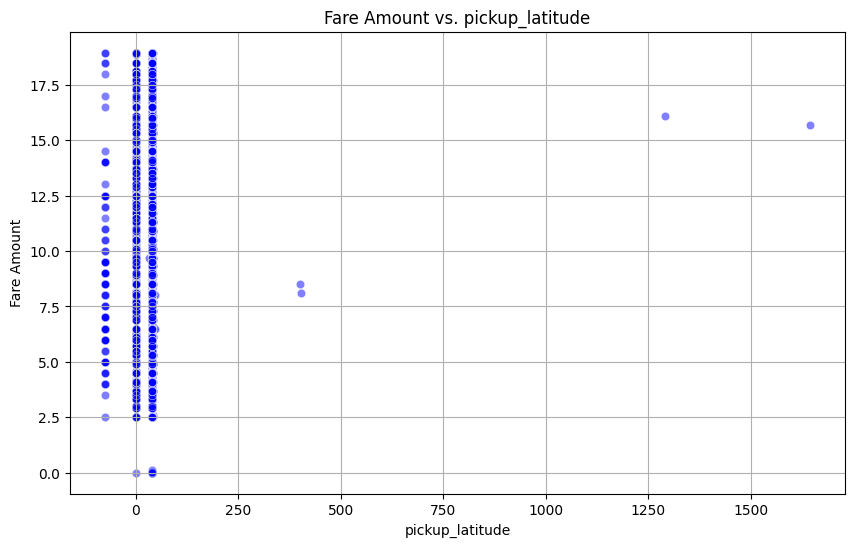

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_latitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. pickup_latitude')
plt.xlabel('pickup_latitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

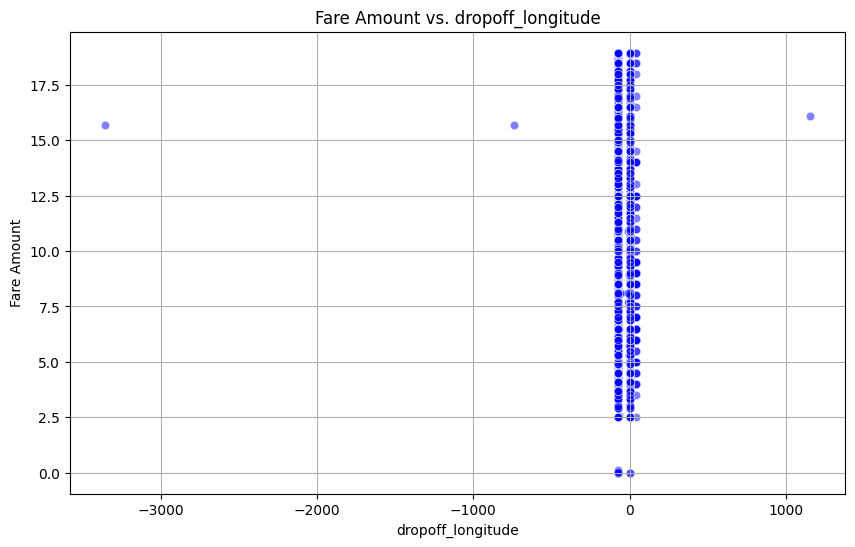

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropoff_longitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. dropoff_longitude')
plt.xlabel('dropoff_longitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

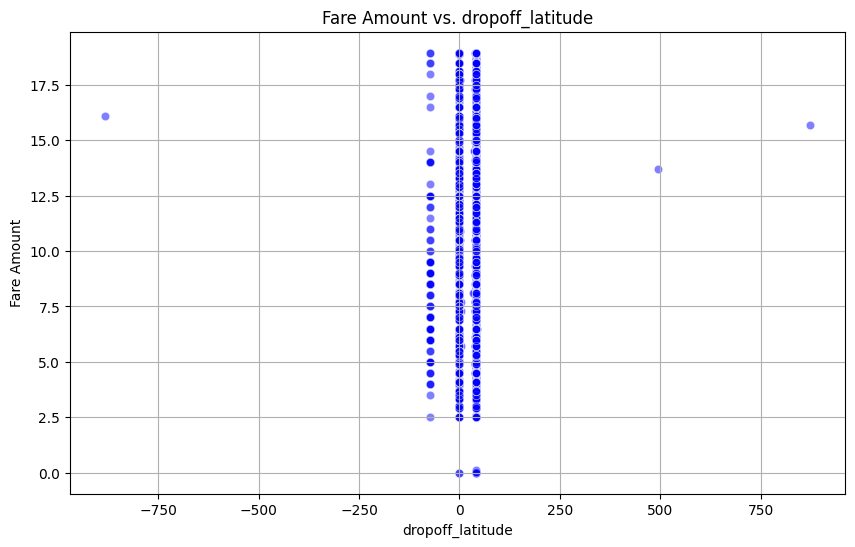

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropoff_latitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. dropoff_latitude')
plt.xlabel('dropoff_latitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [25]:
# Drop rows where passenger count is greater than 50
data_clean = data_clean[data_clean['passenger_count'] <= 50]

# Drop rows where passenger count is 0
data_clean = data_clean[data_clean['passenger_count'] != 0]

# Drop rows where fare amount is less than or equal to zero
data_clean = data_clean[(data_clean['fare_amount'] > 1)]

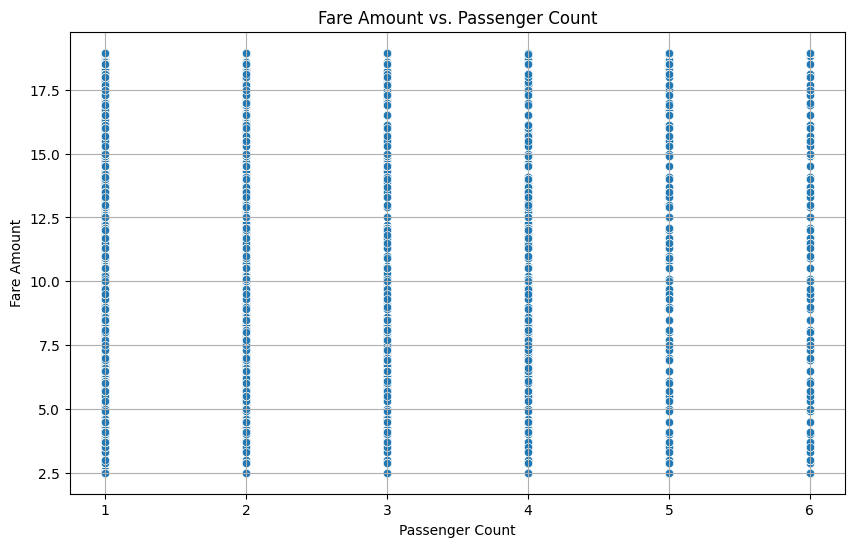

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=data_clean)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

# Feature Engineering and Correlation Analysis

In [27]:
### Converting pickup_datetime column to datetime format
data_clean['pickup_datetime'] = pd.to_datetime(data_clean['pickup_datetime'])

# Extract hour of day
data_clean['hour_of_day'] = data_clean['pickup_datetime'].dt.hour

# Create time of day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_clean['time_of_day'] = data_clean['hour_of_day'].apply(get_time_of_day)

In [28]:
# Filter rows with invalid longitude and latitude values
invalid_picklon_rows = data_clean[(data_clean['pickup_longitude'] < -180) | (data_clean['pickup_longitude'] > 180)]
invalid_picklat_rows=  data_clean[(data_clean['pickup_latitude'] < -90) | (data_clean['pickup_latitude'] > 90)]
invalid_droplon_rows = data_clean[(data_clean['dropoff_longitude'] < -180) | (data_clean['dropoff_longitude'] > 180)]
invalid_droplat_rows=  data_clean[(data_clean['dropoff_latitude'] < -90) | (data_clean['dropoff_latitude'] > 90)]

# Display rows with invalid longitude and latitude values
print("Rows with invalid pickup_longitude values:")
print(invalid_picklon_rows)

print("Rows with invalid pickup_latitude values:")
print(invalid_picklat_rows)

print("Rows with invalid pickup_longitude values:")
print(invalid_droplon_rows)

print("Rows with invalid pickup_latitude values:")
print(invalid_droplat_rows)

Rows with invalid pickup_longitude values:
        Unnamed: 0                            key  fare_amount  \
4544      42931506  2012-04-28 00:58:00.000000235          4.9   
69322     33249845   2011-11-05 00:22:00.00000051         15.7   
94817     16826862  2011-10-14 19:04:00.000000202         12.9   
131887     9421322   2009-08-26 11:55:00.00000023          7.3   
147787    25264921   2010-05-12 12:19:00.00000098          4.1   
182774    44787414   2012-07-21 16:19:00.00000099          4.1   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
4544   2012-04-28 00:58:00+00:00       -748.016667        40.739957   
69322  2011-11-05 00:22:00+00:00      -1340.648410      1644.421482   
94817  2011-10-14 19:04:00+00:00       -736.216667        40.767035   
131887 2009-08-26 11:55:00+00:00       -768.550000        40.757812   
147787 2010-05-12 12:19:00+00:00       -735.433332        40.740605   
182774 2012-07-21 16:19:00+00:00       -736.400000        40.774307 

In [29]:
# Replace invalid longitude and latitude values with NaN
data_clean.loc[(data_clean['pickup_longitude'] < -180) | (data_clean['pickup_longitude'] > 180), 'pickup_longitude'] = np.nan
data_clean.loc[(data_clean['pickup_latitude'] < -90) | (data_clean['pickup_latitude'] > 90), 'pickup_latitude'] = np.nan
data_clean.loc[(data_clean['dropoff_longitude'] < -180) | (data_clean['dropoff_longitude'] > 180), 'dropoff_longitude'] = np.nan
data_clean.loc[(data_clean['dropoff_latitude'] < -90) | (data_clean['dropoff_latitude'] > 90), 'dropoff_latitude'] = np.nan



# Impute NaN values with median longitude and latitude
median_longitude = data_clean['pickup_longitude'].median()
data_clean['pickup_longitude'].fillna(median_longitude, inplace=True)

median_latitude = data_clean['pickup_latitude'].median()
data_clean['pickup_latitude'].fillna(median_latitude, inplace=True)

median_longitude = data_clean['dropoff_longitude'].median()
data_clean['dropoff_longitude'].fillna(median_longitude, inplace=True)

median_latitude = data_clean['dropoff_latitude'].median()
data_clean['dropoff_latitude'].fillna(median_latitude, inplace=True)




In [30]:
# Check if all longitude and latitude values are within the valid range
valid_longitude_range = (data_clean['pickup_longitude'] >= -180) & (data_clean['pickup_longitude'] <= 180)
print("All pickup_longitude values within valid range:", valid_longitude_range.all())

valid_latitude_range = (data_clean['pickup_latitude'] >= -90) & (data_clean['pickup_latitude'] <= 90)
print("All pickup_latitude values within valid range:", valid_latitude_range.all())

valid_longitude_range = (data_clean['dropoff_longitude'] >= -180) & (data_clean['dropoff_longitude'] <= 180)
print("All dropoff_longitude values within valid range:", valid_longitude_range.all())

valid_latitude_range = (data_clean['dropoff_latitude'] >= -90) & (data_clean['dropoff_latitude'] <= 90)
print("All dropoff_latitude values within valid range:", valid_latitude_range.all())


All pickup_longitude values within valid range: True
All pickup_latitude values within valid range: True
All dropoff_longitude values within valid range: True
All dropoff_latitude values within valid range: True


In [31]:
# Calculate trip distance in kilometers
data_clean['distance_km'] = data_clean.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']),
                                                             (row['dropoff_latitude'], row['dropoff_longitude'])),
                                      axis=1)

In [32]:
data_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,time_of_day,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,Evening,1.683325
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,Evening,2.457593
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,Night,5.036384
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,Morning,1.661686
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,Evening,4.475456


In [33]:
#Remove columns that are no longer needed
data_clean.drop(columns=['Unnamed: 0','key','pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
data_clean.head()

,fare_amount,passenger_count,hour_of_day,time_of_day,distance_km
0,7.5,1,19,Evening,1.683325
1,7.7,1,20,Evening,2.457593
2,12.9,1,21,Night,5.036384
3,5.3,3,8,Morning,1.661686
4,16.0,5,17,Evening,4.475456


In [34]:
data_clean.shape

(182144, 5)

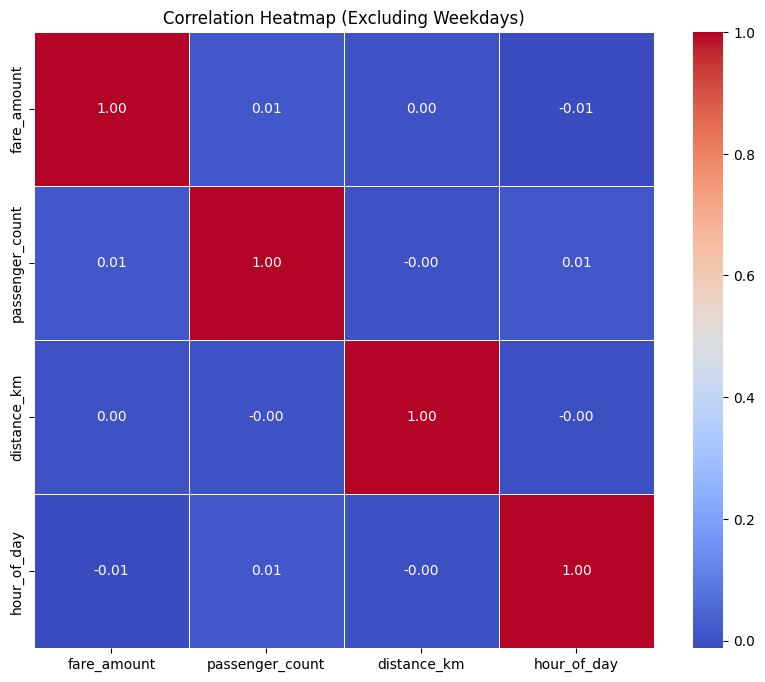

In [35]:
# Selecting only numeric columns for the correlation matrix
numeric_columns = ['fare_amount', 'passenger_count', 'distance_km','hour_of_day']

# Calculating the correlation matrix for numeric columns of the DataFrame df_filtered
correlation_matrix = data_clean[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Weekdays)')
plt.show()


In [36]:
# Create dummy variables for weekdays
time_of_day_dummies = pd.get_dummies(data_clean['time_of_day'])

# Concatenate the dummy variables with the original DataFrame
data_with_dummies = pd.concat([data_clean,time_of_day_dummies], axis=1)

# Drop the original 'weekday' column as it is no longer needed
data_with_dummies.drop('time_of_day', axis=1, inplace=True)


In [37]:
# Convert boolean columns to integers
data_with_dummies['Morning'] = data_with_dummies['Morning'].astype(int)
data_with_dummies['Afternoon'] = data_with_dummies['Afternoon'].astype(int)
data_with_dummies['Evening'] = data_with_dummies['Evening'].astype(int)
data_with_dummies['Night'] = data_with_dummies['Night'].astype(int)

# Splitting the Dataset : Train and Test



In [38]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(0)

# Perform train-test split
data_clean_train, data_clean_test = train_test_split(data_with_dummies, train_size=0.7, test_size=0.3, random_state=100)

# Check the shapes of the resulting dataframes
print("Shape of training data:", data_clean_train.shape)
print("Shape of testing data:", data_clean_test.shape)


Shape of training data: (127500, 8)
Shape of testing data: (54644, 8)


In [39]:
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
cols_to_scale = ['fare_amount', 'passenger_count', 'distance_km','hour_of_day']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
data_clean_train[cols_to_scale] = scaler.fit_transform(data_clean_train[cols_to_scale])
data_clean_test[cols_to_scale] = scaler.transform(data_clean_test[cols_to_scale])

# Display the scaled data
print(data_clean_train.head())


        fare_amount  passenger_count  hour_of_day  distance_km  Afternoon  \
13139     -0.296245        -0.528348     0.226495    -0.051179          1   
112541     1.696621        -0.528348    -1.921361    -0.030096          0   
115316     0.201972        -0.528348    -2.074780    -0.035351          0   
136385    -0.595175         1.001809    -2.074780    -0.046618          0   
157489    -0.495532         2.531967     0.073076    -0.045781          1   

        Evening  Morning  Night  
13139         0        0      0  
112541        0        0      1  
115316        0        0      1  
136385        0        0      1  
157489        0        0      0  


In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Compute the correlation matrix
correlation_matrix = data_clean_train.corr()

# Print correlation coefficients with respect to the target variable (fare_amount)
print(correlation_matrix['fare_amount'].sort_values(ascending=False))


fare_amount        1.000000
Night              0.053713
passenger_count    0.012891
distance_km        0.003794
Evening           -0.008019
hour_of_day       -0.011132
Afternoon         -0.020881
Morning           -0.027467
Name: fare_amount, dtype: float64


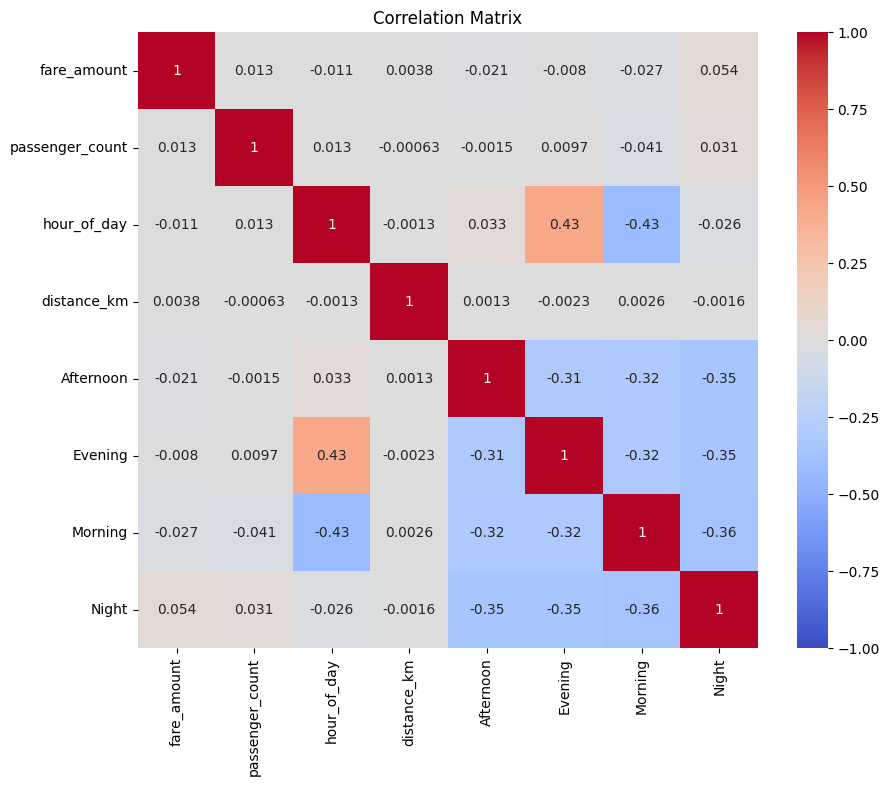

In [41]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Training the Regression Model

In [42]:
y_train = data_clean_train.pop('fare_amount')
X_train = data_clean_train

y_test = data_clean_test.pop('fare_amount')
X_test = data_clean_test

In [43]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Check the parameters obtained
lr.params

const             -0.002509
passenger_count    0.010850
hour_of_day       -0.021729
distance_km        0.003928
Afternoon         -0.033832
Evening            0.004697
Morning           -0.060382
Night              0.087007
dtype: float64

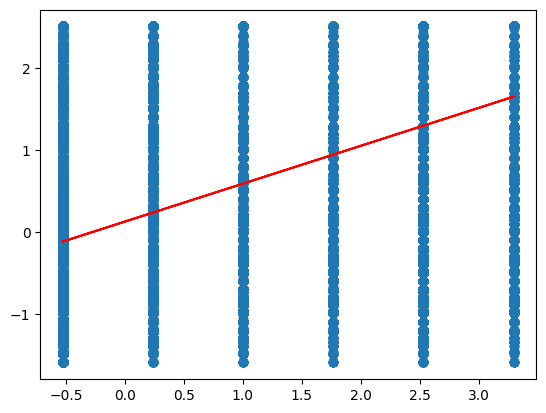

In [45]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

# Evaluatiing the model and Getting the insights

In [46]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     74.60
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.39e-93
Time:                        09:11:22   Log-Likelihood:            -1.8069e+05
No. Observations:              127500   AIC:                         3.614e+05
Df Residuals:                  127493   BIC:                         3.615e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0025      0.002     

In [47]:
# Dropping insignificant variables, high p value

X = X_train.drop('Evening', axis=1)

In [48]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hour_of_day,1.39
4,Evening,1.20
5,Morning,1.19
0,passenger_count,1.00
2,distance_km,1.00
3,Afternoon,1.00
6,Night,1.00


In [50]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     74.60
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.39e-93
Time:                        09:11:23   Log-Likelihood:            -1.8069e+05
No. Observations:              127500   AIC:                         3.614e+05
Df Residuals:                  127493   BIC:                         3.615e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.006     

In [52]:
# Dropping insignificant variables, high p value

X = X_train.drop('distance_km', axis=1)

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hour_of_day,1.39
4,Evening,1.20
5,Morning,1.19
0,passenger_count,1.00
2,distance_km,1.00
3,Afternoon,1.00
6,Night,1.00


In [54]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     89.12
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           6.38e-94
Time:                        09:11:24   Log-Likelihood:            -1.8069e+05
No. Observations:              127500   AIC:                         3.614e+05
Df Residuals:                  127494   BIC:                         3.615e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0025      0.002     

In [56]:
# Dropping insignificant variables, high p value

X = X_train.drop('Evening', axis=1)

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hour_of_day,1.39
4,Evening,1.20
5,Morning,1.19
0,passenger_count,1.00
2,distance_km,1.00
3,Afternoon,1.00
6,Night,1.00


In [58]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     74.60
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.39e-93
Time:                        09:11:26   Log-Likelihood:            -1.8069e+05
No. Observations:              127500   AIC:                         3.614e+05
Df Residuals:                  127493   BIC:                         3.615e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.006     